In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
#Importing dataset
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Area,10/4/2015 0:00,10/4/2015 0:05,10/4/2015 0:10,10/4/2015 0:15,10/4/2015 0:20,10/4/2015 0:25,10/4/2015 0:30,10/4/2015 0:35,10/4/2015 0:40,...,10/4/2015 23:10,10/4/2015 23:15,10/4/2015 23:20,10/4/2015 23:25,10/4/2015 23:30,10/4/2015 23:35,10/4/2015 23:40,10/4/2015 23:45,10/4/2015 23:50,10/4/2015 23:55
0,A1,3,12,4,9,5,14,4,4,8,...,6,2,11,8,6,8,8,5,9,5
1,A2,6,0,8,4,4,4,2,5,3,...,3,3,7,4,4,7,2,2,6,4
2,A3,7,6,10,4,7,3,1,4,5,...,0,0,10,12,10,12,5,2,12,9
3,A4,11,3,6,7,3,10,6,5,3,...,0,1,10,11,8,7,4,3,6,5
4,A5,7,7,10,13,7,16,12,7,18,...,15,16,36,26,17,24,13,8,12,8


In [8]:
#Getting np array
data= dataset.iloc[:,1:].values

In [11]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


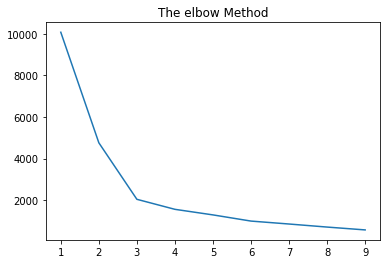

In [16]:
#Finding the number of clusters
wcss = []
for x in range(1,10):
    km_final = KMeans(n_clusters=x , init = 'k-means++',max_iter = 100, n_init = 10, random_state=0)
    km_final.fit(data)
    wcss.append(km_final.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title("The elbow Method")
plt.show()

The elbow at 3 represents that there are 3 classes in the dataset

In [21]:
#Applying K-means to our data set
km_final = KMeans(n_clusters=3 , init = 'k-means++',max_iter = 300, n_init = 10, random_state=0)
#Fitting the data
km_final.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [22]:
labels = km_final.predict(data)

In [23]:
labels

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0])

### Making the classifier on cluster neighbours

In [24]:
from sklearn.base

In [25]:
classifier = DecisionTreeClassifier()
classifier.fit(data,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')